In [2]:
import matplotlib.pyplot as plt
import numpy as np


def calculate_return_on_investment(house_price, down_payment_ratio, interest_rate, monthly_rent):
    # 计算首付金额，包括额外的11.5%购房成本
    initial_down_payment = house_price * down_payment_ratio
    additional_costs = house_price * 0.11
    total_down_payment = initial_down_payment + additional_costs
    
    # 计算总购买成本
    total_cost = house_price * 1.11
    
    # 计算贷款本金
    loan_amount = total_cost - initial_down_payment
    
    # 转换年利率为月利率
    monthly_interest_rate = interest_rate / 12
    
    # 假设贷款期限为30年（360个月）
    loan_term_months = 30 * 12
    
    # 计算每月还款额
    monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** loan_term_months) / ((1 + monthly_interest_rate) ** loan_term_months - 1)
    
    # 初始化贷款余额
    current_balance = loan_amount
    annual_interest_payment = 0
    
    # 计算一年内的利息支出
    for month in range(12):
        interest_payment = current_balance * monthly_interest_rate
        principal_payment = monthly_payment - interest_payment
        annual_interest_payment += interest_payment
        current_balance -= principal_payment
    
    # 计算年收入
    annual_rent_income = monthly_rent * 12
    
    # 计算净年收益
    net_annual_profit = annual_rent_income - annual_interest_payment
    
    # 计算收益率（净年收益 / 总首付金额）
    return_on_investment = net_annual_profit / total_down_payment
    
    return total_down_payment, monthly_payment, return_on_investment * 100  # 将收益率转换为百分比


In [9]:
# 示例使用
house_price = 250000
# down_payment = 80000 
down_payment_ratio = 0.02
interest_rate = 0.035  # 年利率
monthly_rent = 1000

down_payment, monthly_payment, roi = calculate_return_on_investment(house_price, down_payment_ratio, interest_rate, monthly_rent)
print(f"首付金额: {down_payment:.2f}元")
print(f"每月还款额（月供）: {monthly_payment:.2f}元")
print(f"年投资收益率: {roi:.2f}%")


首付金额: 32500.00元
每月还款额（月供）: 1223.65元
年投资收益率: 7.83%


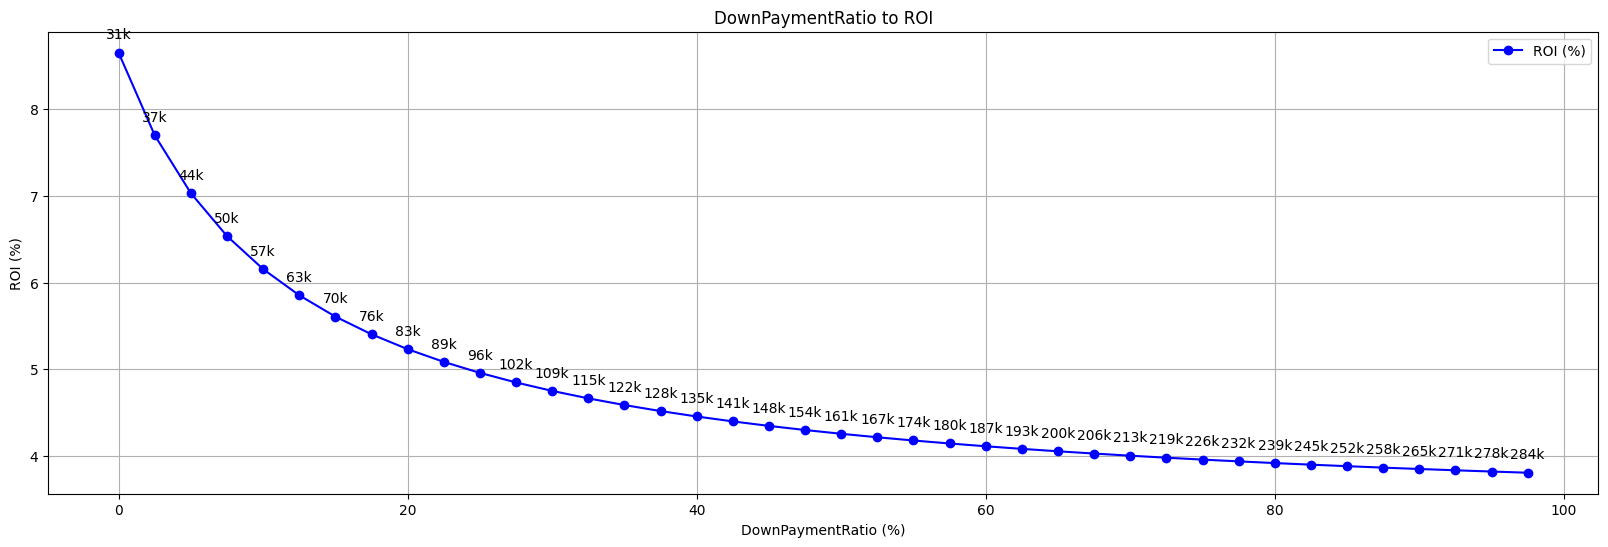

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 定义计算收益率的函数
def calculate_return_on_investment2(house_price, down_payment_ratio, interest_rate, monthly_rent):
    # 计算首付金额，包括额外的11.5%购房成本
    initial_down_payment = house_price * down_payment_ratio
    additional_costs = house_price * 0.1175
    total_down_payment = initial_down_payment + additional_costs
    
    # 如果首付总额超过了房价总成本，则贷款金额为0
    total_cost = house_price * 1.1175
    if total_down_payment > total_cost:
        loan_amount = 0
    else:
        loan_amount = total_cost - initial_down_payment
    
    # 贷款金额为0时，避免除以0的错误
    if loan_amount == 0:
        monthly_payment = 0
        annual_interest_payment = 0
    else:
        # 转换年利率为月利率
        monthly_interest_rate = interest_rate / 12
        # 假设贷款期限为30年（360个月）
        loan_term_months = 30 * 12
        # 计算每月还款额
        monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** loan_term_months) / ((1 + monthly_interest_rate) ** loan_term_months - 1)
        # 初始化贷款余额
        current_balance = loan_amount
        annual_interest_payment = 0

        for month in range(12):
            interest_payment = current_balance * monthly_interest_rate
            principal_payment = monthly_payment - interest_payment
            annual_interest_payment += interest_payment
            current_balance -= principal_payment

    # 计算年收入
    annual_rent_income = monthly_rent * 12
    
    # 计算净年收益
    net_annual_profit = annual_rent_income - annual_interest_payment
    
    # 计算收益率（净年收益 / 总首付金额）
    return_on_investment = net_annual_profit / total_down_payment if total_down_payment != 0 else 0
    
    return return_on_investment * 100, total_down_payment  # 将收益率转换为百分比

# 输入参数
house_price = 260000
interest_rate = 0.0325 
monthly_rent = 1000

# 计算不同首付比例的收益率
down_payment_ratios = np.arange(0., 1.0, 0.025)
rois = []
down_payments = []

for ratio in down_payment_ratios:
    roi, total_down_payment = calculate_return_on_investment2(house_price, ratio, interest_rate, monthly_rent)
    rois.append(roi)
    down_payments.append(total_down_payment)

# 绘制折线图
plt.figure(figsize=(20, 6))
plt.plot(down_payment_ratios * 100, rois, 'b-', marker='o', label='ROI (%)')
plt.xlabel('DownPaymentRatio (%)')
plt.ylabel('ROI (%)')
plt.title('DownPaymentRatio to ROI')

# 添加对应的首付金额标注
for i, txt in enumerate(down_payments):
    plt.annotate(f'{txt/1000:.0f}k', (down_payment_ratios[i] * 100, rois[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.legend()
plt.show()
